In [163]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [164]:
# reading Sony Stock data using pandas data reader
df_sony=pdr.get_data_yahoo('Sony')

In [165]:
df_sony.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-05-16,87.160004,85.959999,86.290001,86.360001,546100,86.360001
2022-05-17,87.940002,86.809998,87.470001,87.690002,562300,87.690002
2022-05-18,89.230003,86.940002,88.800003,87.070000,1066600,87.070000
2022-05-19,89.730003,87.870003,88.099998,88.709999,778500,88.709999
2022-05-20,90.500000,88.220001,89.940002,89.940002,806100,89.940002


<AxesSubplot:xlabel='Date'>

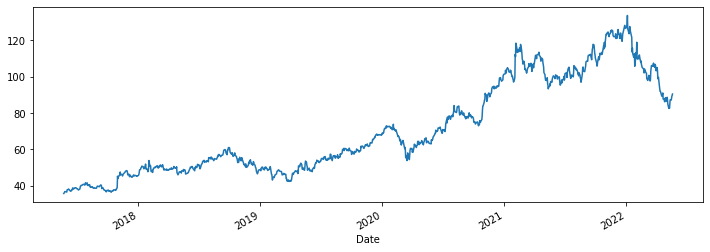

In [166]:
df_sony['High'].plot(figsize=(12,4))

<AxesSubplot:xlabel='Date'>

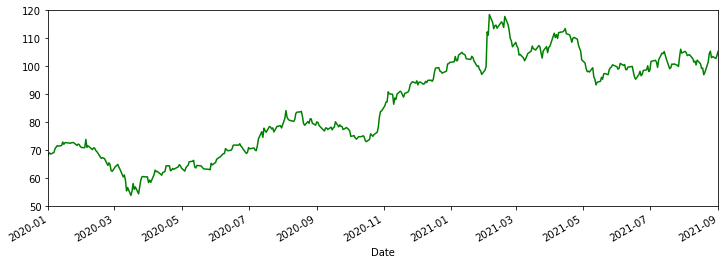

In [167]:
## seeing stock trand in a particular time range using xlimit and y limit
df_sony['High'].plot(xlim=['2020-01-01','2021-09-01'],ylim=[50,120],figsize=(12,4),c='green')

In [168]:
index=df_sony.loc['2020-01-01':'2021-09-01'].index
share_open=df_sony.loc['2020-01-01':'2021-09-01']['Open']

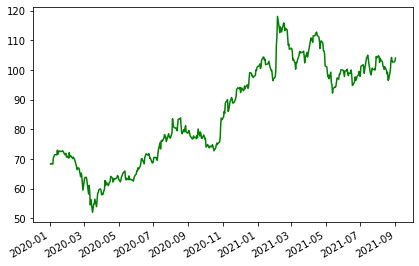

In [169]:
figure,axis=plt.subplots()
plt.tight_layout()
## Preventing overlapping
figure.autofmt_xdate()
axis.plot(index,share_open,c="green")

In [170]:
df_sony.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2017-05-23 to 2022-05-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1259 non-null   float64
 1   Low        1259 non-null   float64
 2   Open       1259 non-null   float64
 3   Close      1259 non-null   float64
 4   Volume     1259 non-null   int64  
 5   Adj Close  1259 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 108.9 KB


In [171]:
df_sony.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03,1259.000000
mean,70.754138,69.646751,70.244988,70.210842,1.057162e+06,70.210842
std,25.887598,25.426396,25.688560,25.652023,6.781670e+05,25.652023
min,35.759998,35.509998,35.669998,35.549999,1.882000e+05,35.549999
25%,49.615000,48.785000,49.144999,49.169998,6.404500e+05,49.169998
50%,60.599998,59.680000,60.139999,60.330002,8.889000e+05,60.330002
75%,97.225002,95.994999,96.590000,96.689999,1.241700e+06,96.689999
max,133.750000,128.309998,133.559998,128.589996,8.331100e+06,128.589996


### Different Kind of Resampling on Sony Stock Dataset

In [172]:
# Yearly minimum stock price
df_sony.resample(rule='A').min()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-31,35.759998,35.509998,35.669998,35.549999,188200,35.549999
2018-12-31,45.810001,44.529999,45.439999,45.500000,362600,45.500000
2019-12-31,42.360001,41.910000,42.049999,42.029999,264500,42.029999
2020-12-31,53.860001,50.939999,52.000000,51.680000,301800,51.680000
2021-12-31,93.360001,91.750000,92.180000,92.970001,232200,92.970001
2022-12-31,82.599998,79.940002,81.709999,80.059998,345600,80.059998


<AxesSubplot:xlabel='Date'>

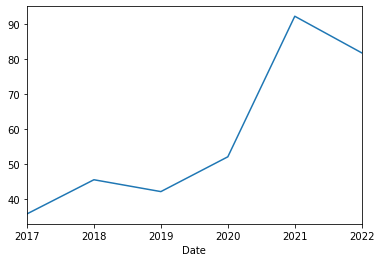

In [173]:
##year end frequency
df_sony.resample(rule='A').min()['Open'].plot()

In [174]:
# Yearly maximum stock price
df_sony.resample(rule='A').max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-31,48.330002,47.910000,48.290001,48.299999,6813800,48.299999
2018-12-31,61.020000,60.529999,61.000000,60.650002,6676300,60.650002
2019-12-31,68.470001,68.000000,68.199997,68.250000,8331100,68.250000
2020-12-31,101.400002,100.610001,100.930000,101.099998,3626500,101.099998
2021-12-31,128.300003,127.279999,128.000000,127.480003,3026200,127.480003
2022-12-31,133.750000,128.309998,133.559998,128.589996,3961500,128.589996


<AxesSubplot:xlabel='Date'>

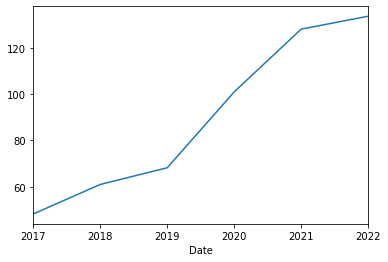

In [175]:
##year end frequency
df_sony.resample(rule='A').max()['Open'].plot()

<AxesSubplot:xlabel='Date'>

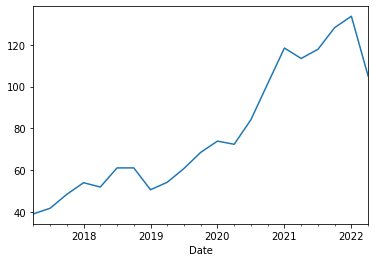

In [176]:
##quaterly high plot
df_sony.resample(rule='QS').max()['High'].plot()

In [177]:
##Business End Frequency
df_sony.resample(rule='BA').max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-29,48.330002,47.910000,48.290001,48.299999,6813800,48.299999
2018-12-31,61.020000,60.529999,61.000000,60.650002,6676300,60.650002
2019-12-31,68.470001,68.000000,68.199997,68.250000,8331100,68.250000
2020-12-31,101.400002,100.610001,100.930000,101.099998,3626500,101.099998
2021-12-31,128.300003,127.279999,128.000000,127.480003,3026200,127.480003
2022-12-30,133.750000,128.309998,133.559998,128.589996,3961500,128.589996


In [178]:
df_sony.resample(rule='BQS').max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-04-03,38.939999,38.619999,38.779999,38.869999,2708800,38.869999
2017-07-03,41.650002,41.130001,41.490002,41.290001,1646100,41.290001
2017-10-02,48.330002,47.910000,48.290001,48.299999,6813800,48.299999
2018-01-01,53.910000,51.570000,53.000000,51.990002,3954200,51.990002
2018-04-02,51.840000,51.200001,51.430000,51.700001,6676300,51.700001
2018-07-02,61.000000,60.470001,61.000000,60.650002,3685600,60.650002
2018-10-01,61.020000,60.529999,60.810001,60.580002,2727300,60.580002
2019-01-01,50.540001,49.790001,50.150002,50.180000,6962800,50.180000
2019-04-01,54.119999,53.290001,54.049999,53.939999,8331100,53.939999


<AxesSubplot:xlabel='Date'>

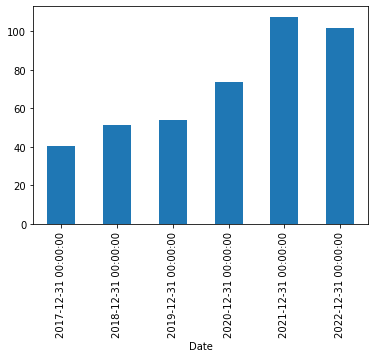

In [179]:
##plotting
df_sony['Open'].resample(rule='A').mean().plot(kind='bar')

<AxesSubplot:xlabel='Date'>

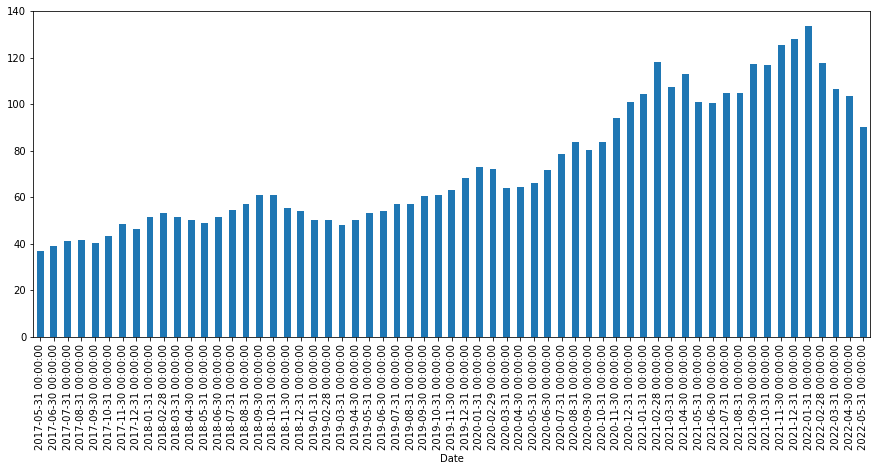

In [180]:
# Monthly maximum stock price plotting
df_sony['Open'].resample(rule='M').max().plot(kind='bar',figsize=(15,6))

In [181]:
monthly_avg=df_sony.resample(rule='M').mean()
monthly_avg.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-05-31,36.368333,36.011666,36.131667,36.253333,1.521150e+06,36.253333
2017-06-30,38.046364,37.676364,37.880000,37.865454,9.670273e+05,37.865454
2017-07-31,39.878000,39.552500,39.670500,39.781000,7.933450e+05,39.781000
2017-08-31,39.489565,39.113478,39.341739,39.278261,6.678739e+05,39.278261
2017-09-30,38.568500,38.218500,38.450999,38.389000,7.362450e+05,38.389000


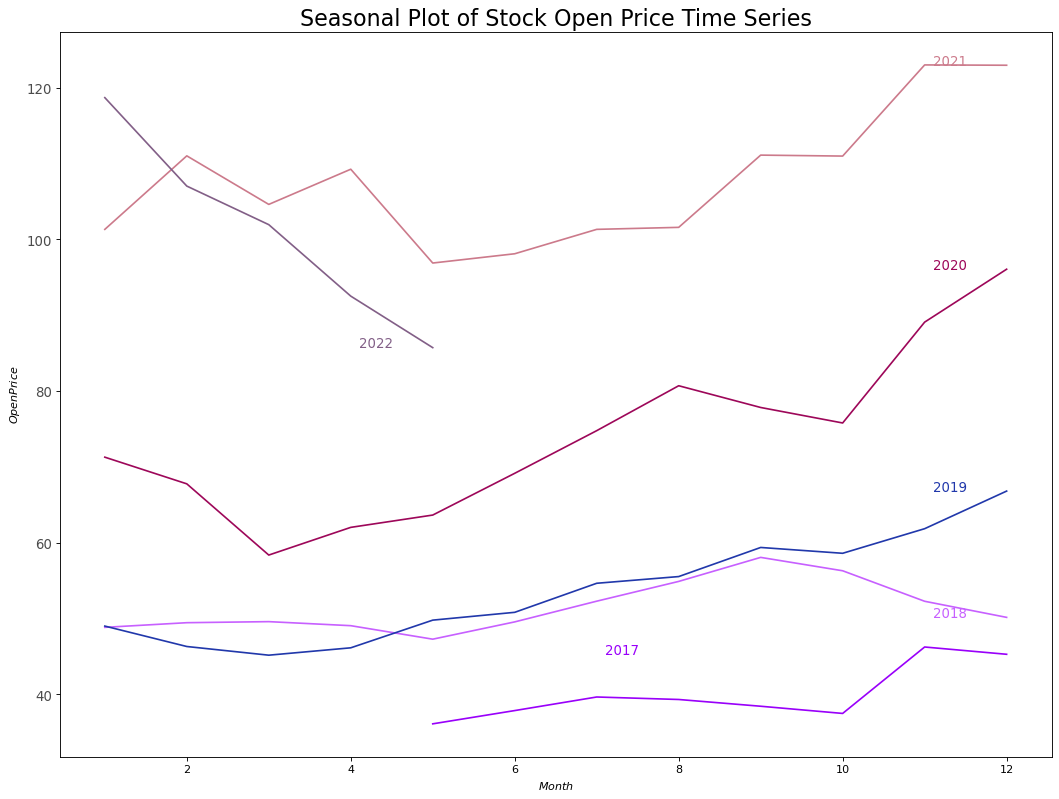

In [182]:
# Prepare data for plotting to check if  there is any seasonality in the data
monthly_avg['year'] = [d.year for d in monthly_avg.index]
monthly_avg['month'] = [d.month for d in monthly_avg.index]
years = monthly_avg['year'].unique()


# Prep Colors
import matplotlib as mpl
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)


# Draw Plot

plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i >= 0:        
        plt.plot('month', 'Open', data=monthly_avg.loc[monthly_avg.year==y, :], color=mycolors[i], label=y)
        plt.text(monthly_avg.loc[monthly_avg.year==y, :].shape[0]-.9, monthly_avg.loc[monthly_avg.year==y, 'Open'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# # Decoration
plt.gca().set( ylabel='$Open Price$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Stock Open Price Time Series", fontsize=20)
plt.show()


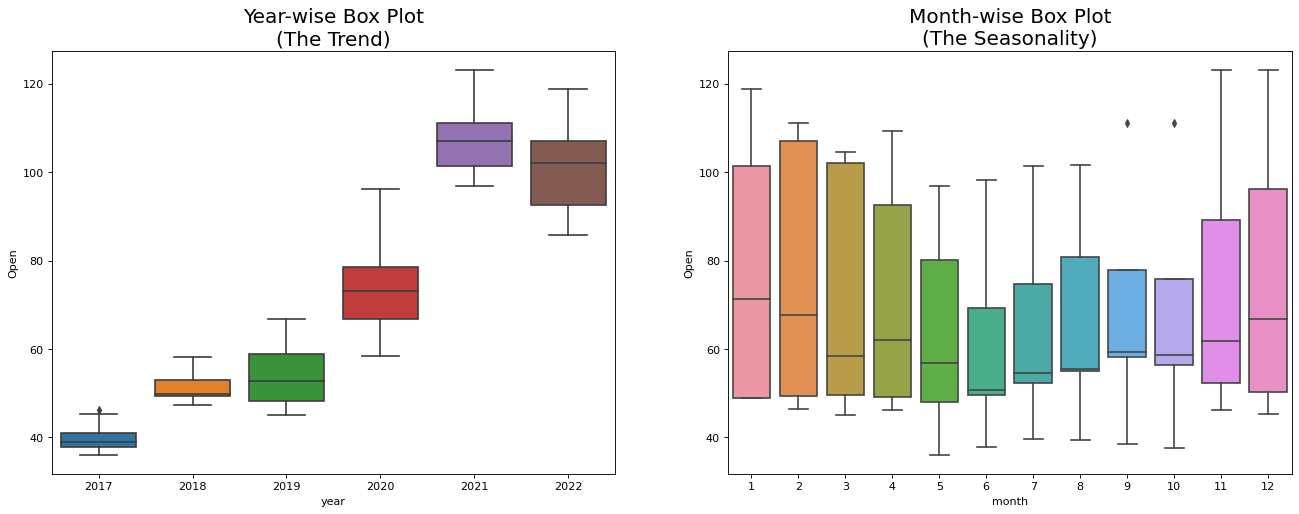

In [183]:
#year wise and month wise boxplot of Open Price
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='Open', data=monthly_avg, ax=axes[0])
sns.boxplot(x='month', y='Open', data=monthly_avg, ax=axes[1])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()


#### We can do a classical decomposition of a time series by considering the series as an additive or multiplicative combination of the base level, trend, seasonal index and the residual.

In [197]:
#from statsmodels.tsa.seasonal import seasonal_decompose
#from dateutil.parser import parse
import statsmodels.api as sm

weekly_avg=df_sony.resample(rule='W-MON').mean()
s=sm.tsa.seasonal_decompose(weekly_avg.Open,)


In [186]:
df_sony.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2017-05-23,35.759998,35.509998,35.669998,35.549999,537700,35.549999
1,2017-05-24,36.049999,35.669998,35.720001,36.020000,1047100,36.020000
2,2017-05-25,36.209999,35.799999,35.980000,36.169998,1718400,36.169998
3,2017-05-26,36.820000,36.250000,36.250000,36.680000,2708800,36.680000
4,2017-05-30,36.700001,36.389999,36.540001,36.480000,2067900,36.480000


In [190]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
df_sony['Open']

Date
2017-05-23    35.669998
2017-05-24    35.720001
2017-05-25    35.980000
2017-05-26    36.250000
2017-05-30    36.540001
                ...    
2022-05-16    86.290001
2022-05-17    87.470001
2022-05-18    88.800003
2022-05-19    88.099998
2022-05-20    89.940002
Name: Open, Length: 1259, dtype: float64

In [65]:
df_sony['Open_30_days_rolling']=df_sony['Open'].rolling(30).mean()

<AxesSubplot:xlabel='Date'>

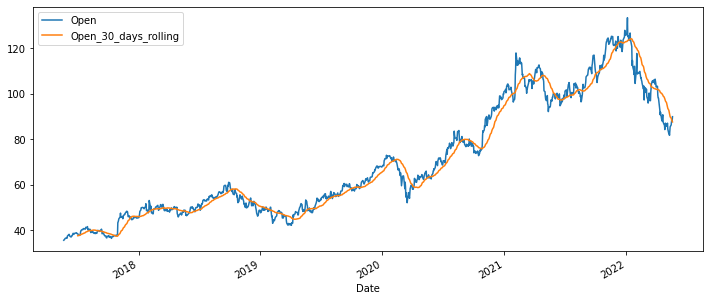

In [66]:
## smoothening stock data using rolling average
df_sony[['Open','Open_30_days_rolling']].plot(figsize=(12,5))

In [67]:
df_sony.isnull().sum()

High                     0
Low                      0
Open                     0
Close                    0
Volume                   0
Adj Close                0
Open_30_days_rolling    29
dtype: int64

### Predicting Open Price using ARIMA and SARIMA models


In [68]:
df_sony.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close',
       'Open_30_days_rolling'],
      dtype='object')

In [69]:
df_sony['Open']

Date
2017-05-22    35.459999
2017-05-23    35.669998
2017-05-24    35.720001
2017-05-25    35.980000
2017-05-26    36.250000
                ...    
2022-05-16    86.290001
2022-05-17    87.470001
2022-05-18    88.800003
2022-05-19    88.099998
2022-05-20    89.940002
Name: Open, Length: 1260, dtype: float64

<AxesSubplot:xlabel='Date'>

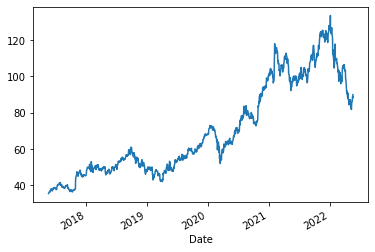

In [70]:
df_sony['Open'].plot()

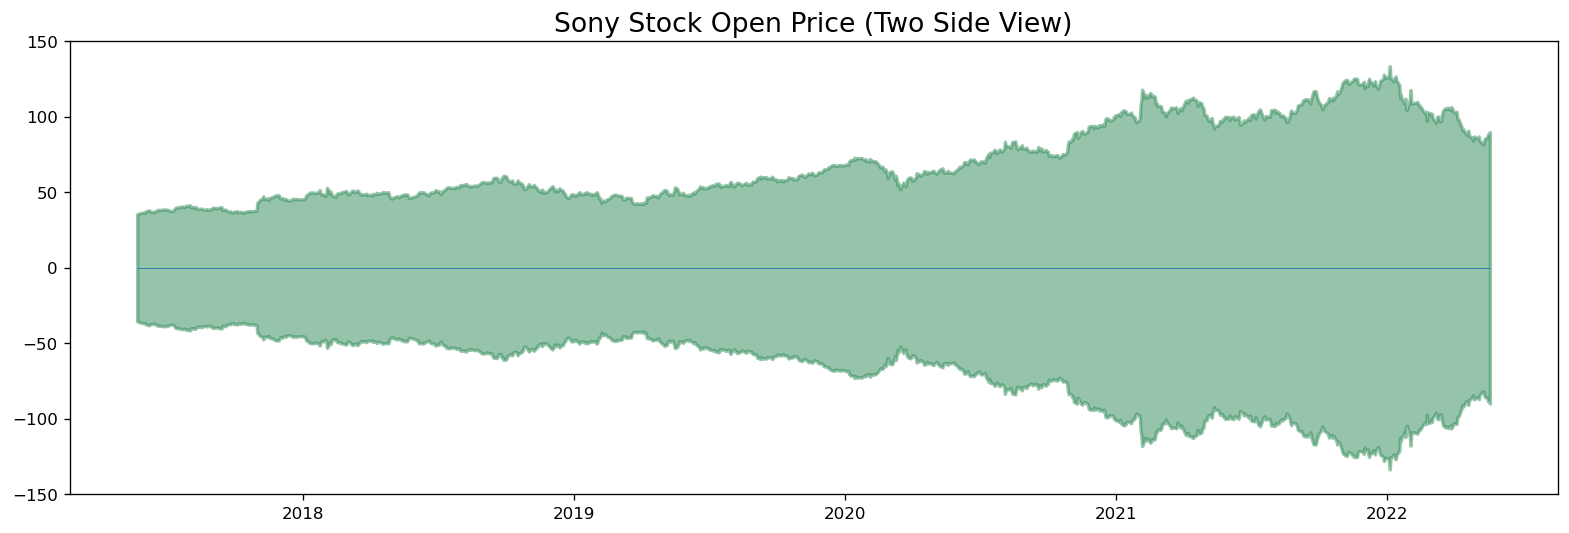

In [111]:
import numpy as np

x = df_sony.index
y1 = df_sony['Open'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-150, 150)
plt.title('Sony Stock Open Price (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df_sony.index), xmax=np.max(df_sony.index), linewidth=.5)
plt.show()

In [77]:
#importing model for Dickey-fuller test
from statsmodels.tsa.stattools import adfuller

### Dickey Fuller Test
#### null hypothesis H0 : Data is not stationary
#### alternate hypothesis H1 : Data is stationary
#### confidence level for the test is 95%


In [78]:
## writing a function to pass a series in Dickey fuller test
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [79]:
adf_test(df_sony['Open'])

ADF Statistics: -1.229800940602831
p- value: 0.6606465524148587
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [80]:
## Use Techniques Differencing
df_sony['Open First Difference']=df_sony['Open']-df_sony['Open'].shift(1)

In [81]:
df_sony.head()

,High,Low,Open,Close,Volume,Adj Close,Open_30_days_rolling,Open First Difference
Date,,,,,,,,
2017-05-22,35.570000,35.380001,35.459999,35.529999,644500,35.529999,NaN,NaN
2017-05-23,35.759998,35.509998,35.669998,35.549999,537700,35.549999,NaN,0.209999
2017-05-24,36.049999,35.669998,35.720001,36.020000,1047100,36.020000,NaN,0.050003
2017-05-25,36.209999,35.799999,35.980000,36.169998,1718400,36.169998,NaN,0.259998
2017-05-26,36.820000,36.250000,36.250000,36.680000,2708800,36.680000,NaN,0.270000


In [82]:
adf_test(df_sony['Open First Difference'].dropna())

ADF Statistics: -9.53725541435935
p- value: 2.787235907664259e-16
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


### We can use d value as 1 because after single step differencing open data has become stationary.

In [83]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

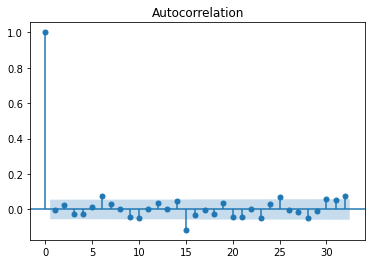

In [84]:
acf = plot_acf(df_sony["Open First Difference"].dropna())

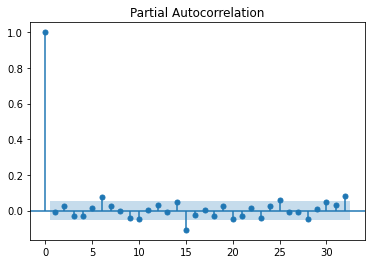

In [85]:
result = plot_pacf(df_sony["Open First Difference"].dropna())

In [86]:
# Splitting training and test data
from datetime import datetime,timedelta
train_dataset_end=datetime(2021,12,30)
test_dataset_end=datetime(2022,5,20)

In [87]:
train_data=df_sony.loc[:train_dataset_end]
test_data=df_sony[train_dataset_end+timedelta(days=1):test_dataset_end]

In [90]:
##prediction start date and end date
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [91]:
test_data

,High,Low,Open,Close,Volume,Adj Close,Open_30_days_rolling,Open First Difference
Date,,,,,,,,
2021-12-31,126.790001,125.500000,125.800003,126.400002,275000,126.400002,123.010001,-0.449997
2022-01-03,127.169998,125.650002,126.400002,126.269997,373700,126.269997,123.045001,0.599998
2022-01-04,129.309998,127.830002,128.529999,128.559998,708700,128.559998,123.151334,2.129997
2022-01-05,133.750000,128.309998,133.559998,128.589996,2594400,128.589996,123.429334,5.029999
2022-01-06,126.309998,122.370003,125.400002,123.110001,1836500,123.110001,123.543667,-8.159996
...,...,...,...,...,...,...,...,...
2022-05-16,87.160004,85.959999,86.290001,86.360001,546100,86.360001,89.313000,0.830002
2022-05-17,87.940002,86.809998,87.470001,87.690002,562300,87.690002,88.784667,1.180000
2022-05-18,89.230003,86.940002,88.800003,87.070000,1066600,87.070000,88.299667,1.330002


In [92]:
## create a ARIMA model
from statsmodels.tsa.arima_model import ARIMA

In [93]:
train_data

,High,Low,Open,Close,Volume,Adj Close,Open_30_days_rolling,Open First Difference
Date,,,,,,,,
2017-05-22,35.570000,35.380001,35.459999,35.529999,644500,35.529999,NaN,NaN
2017-05-23,35.759998,35.509998,35.669998,35.549999,537700,35.549999,NaN,0.209999
2017-05-24,36.049999,35.669998,35.720001,36.020000,1047100,36.020000,NaN,0.050003
2017-05-25,36.209999,35.799999,35.980000,36.169998,1718400,36.169998,NaN,0.259998
2017-05-26,36.820000,36.250000,36.250000,36.680000,2708800,36.680000,NaN,0.270000
...,...,...,...,...,...,...,...,...
2021-12-23,124.269997,123.110001,123.750000,123.860001,514400,123.860001,122.489667,2.239998
2021-12-27,127.400002,124.739998,125.080002,127.209999,548200,127.209999,122.589667,1.330002
2021-12-28,128.300003,127.279999,128.000000,127.480003,415700,127.480003,122.780667,2.919998


In [97]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)
model_ARIMA=ARIMA(train_data['Open'],order=(6,1,6))

/Users/Mimi/opt/anaconda3/envs/venv/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/Mimi/opt/anaconda3/envs/venv/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been pr

In [98]:
model_Arima_fit=model_ARIMA.fit()

/Users/Mimi/opt/anaconda3/envs/venv/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [99]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.Open   No. Observations:                 1161
Model:                 ARIMA(6, 1, 6)   Log Likelihood               -1840.602
Method:                       css-mle   S.D. of innovations              1.181
Date:                Sat, 21 May 2022   AIC                           3709.205
Time:                        21:47:19   BIC                           3780.003
Sample:                             1   HQIC                          3735.917
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0755      0.023      3.287      0.001       0.030       0.121
ar.L1.D.Open     0.4130      0.161      2.571      0.010       0.098       0.728
ar.L2.D.Open    -0.5684      0.159     -3.576      0.000      -0.880      -0.257
ar.L3.D.Open     0.0015      0.057      0.026      0.980      -0.110       0.113
ar.L4.D.Open     0.7710      0.052     14.793      0.000       0.669       0.873
ar.L5.D.Open    -0.4366      0.144     -3.028      0.002      -0.719      -0.154
ar.L6.D.Open     0.7358      0.132      5.578      0.000       0.477       0.994
ma.L1.D.Open    -0.3871      0.160     -2.419      0.016      -0.701      -0.074
ma.L2.D.Open     0.6076      0.171      3.554      0.000       0.273       0.943
ma.L3.D.Open    -0.0370      0.051     -0.730      0.466      -0.136       0.062
ma.L4.D.Open    -0.7988      0.046    -17.486      0.000      -0.888      -0.709
ma.L5.D.Open     0.4130      0.152      2.718      0.007       0.115       0.711
ma.L6.D.Open    -0.7443      0.152     -4.913      0.000      -1.041      -0.447
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0048           -0.0000j            1.0048           -0.5000
AR.2            1.0175           -0.0000j            1.0175           -0.0000
AR.3           -0.1441           -1.0218j            1.0319           -0.2723
AR.4           -0.1441           +1.0218j            1.0319            0.2723
AR.5            0.4344           -1.0293j            1.1173           -0.1864
AR.6            0.4344           +1.0293j            1.1173            0.1864
MA.1           -1.0092           -0.0000j            1.0092           -0.5000
MA.2            1.0107           -0.0000j            1.0107           -0.0000
MA.3           -0.1316           -1.0095j            1.0180           -0.2706
MA.4           -0.1316           +1.0095j            1.0180            0.2706
MA.5            0.4083           -1.0508j            1.1274           -0.1910
MA.6            0.4083           +1.0508j            1.1274            0.1910
-----------------------------------------------------------------------------
"""

In [107]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)

KeyError: 'only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices'